In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [4]:
df.fillna(0,inplace=True)

In [5]:
X = df.iloc[:, [5, 6]].values
X.shape

(12330, 2)

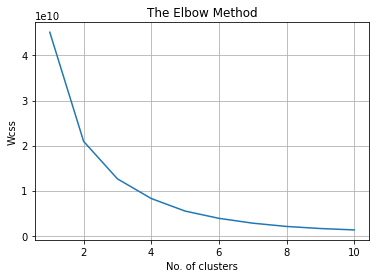

In [6]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0,
              algorithm="full",
              tol=0.0001)
    km.fit(X)
    labels=km.labels_
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.grid()
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("Wcss");

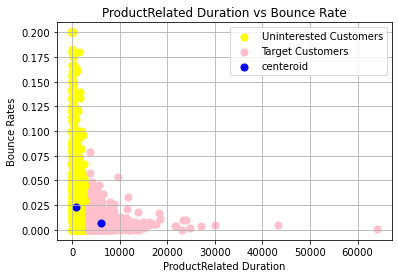

In [7]:
km=KMeans(n_clusters=2,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
y_means=km.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate')
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend();

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels_true=le.fit_transform(df['Revenue'])
labels_pred=y_means

In [9]:
from sklearn import metrics
score=metrics.adjusted_rand_score(labels_true,labels_pred)
print("Adujsted rand index:")
print(score)

Adujsted rand index:
0.08344649929017146


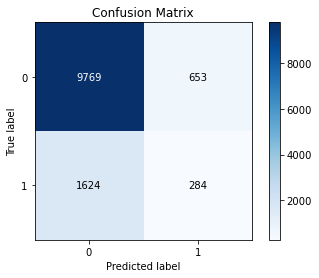

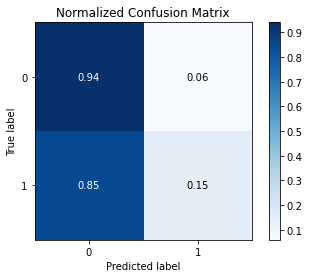

In [10]:
import scikitplot as skplt
plt_1=skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2=skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)